# Cell cycle model CCRMV002

Packages

In [1]:
#using DifferentialEquations
using OrdinaryDiffEq, ParameterizedFunctions, NamedTuples
using PyDSTool, PyCall, PyPlot
using JLD

In [2]:
include("custom_functions.jl");
include("plot_functions.jl");

In [3]:
@load "CCMMV001_data.jld"
bif1_stst = curve_stst
bif1_lcycle = curve_lcycle
bif1_fold1 = curve_fold1
bif1_fold2 = curve_fold2;

In [4]:
@load "CCCMV001_data.jld"
bif2_stst = curve_stst
bif2_lcycle = curve_lcycle;

### Model system of ODE's

Model functions

In [5]:
RadScheme(t) = 0.
HeaviSide(t, a, b) = (a < t < b) ? 1. : 0.
f = @ode_def_bare CCRMV003 begin
    ## System of ODE (vector field)
    dMPF     = k_m0*Mass - (k_m2 + k_m2a*Wee1)*MPF + (k_m1 + k_m1a*Cdc25_P)*MPF_P - (k_m3 + k_m3a*APC_A)*MPF
    dMPF_P   = (k_m2 + k_m2a*Wee1)*MPF - (k_m1 + k_m1a*Cdc25_P)*MPF_P - (k_m3 + k_m3a*APC_A)*MPF_P
    dWee1    = V_w1*(Wee1_T - Wee1)/(J_w1 + Wee1_T - Wee1) - k_w2*(MPF + MPF_P*α)*Wee1/(J_w2 + Wee1)
    dCdc25_P = k_c1*(MPF + MPF_P*α)*(Cdc25_T - Cdc25_P)/(J_c1 + Cdc25_T - Cdc25_P) - (V_c2+k_c2a*Chk2_P)*Cdc25_P/(J_c2 + Cdc25_P)
    dIE_A    = k_i1*(MPF + MPF_P*α)*(IE_T - IE_A)/(J_i1 + IE_T - IE_A) - V_i2*IE_A/(J_i2 + IE_A)
    dAPC_A   = k_a1*IE_A*(APC_T - APC_A)/(J_a1 + APC_T - APC_A) - V_a2*APC_A/(J_a2 + APC_A)
    dChk2_P  = k_h1*ATM*(Chk2_T - Chk2_P)/(J_h1 + Chk2_T - Chk2_P) - V_h2*Chk2_P/(J_h2 + Chk2_P)
    dATM     = k_t1*DSB - k_t2*ATM
    dDSB     = - k_d2*DSB + k_d1*RadScheme(t)
    dMass    = μ*Mass*(1 - Mass/K_Mass)
end k_m0 k_m1 k_m1a k_m2 k_m2a k_m3 k_m3a V_w1 k_w2 J_w1 J_w2 k_c1 V_c2 k_c2a J_c1 J_c2 k_i1 V_i2 J_i1 J_i2 k_a1 V_a2 J_a1 J_a2 k_h1 V_h2 J_h1 J_h2 k_t1 k_t2 k_d1 k_d2 α μ K_Mass Wee1_T Cdc25_T IE_T APC_T Chk2_T θ_M
#end k_m0=>0.2 k_m1=0.4 k_m1a=20.0 k_m2=0.4 k_m2a=50.0 k_m3=0.2 k_m3a=6.35 V_w1=1.0 k_w2=5.3 J_w1=0.01 J_w2=0.01 k_c1=8.5 V_c2=>1.4 k_c2a=>2.2 J_c1=0.01 J_c2=0.01 k_i1=1.7 V_i2=0.4 J_i1=0.001 J_i2=0.001 k_a1=6.8 V_a2=1.7 J_a1=0.001 J_a2=0.001 k_h1=0.042 V_h2=0.2 J_h1=0.001 J_h2=0.001 k_t1=1.1 k_t2=1.0 k_d1=35.00 k_d2=0.18 α=0.05 μ=0.07 K_Mass=>2.7 Wee1_T=1.0 Cdc25_T=1.0 IE_T=1.0 APC_T=1.0 Chk2_T=1.0 θ_M=>0.2

(::CCRMV003) (generic function with 2 methods)

In [6]:
params = @NT(k_m0=0.2, k_m1=0.4, k_m1a=20.0, k_m2=0.4, k_m2a=50.0, k_m3=0.2, k_m3a=6.35, V_w1=1.0, k_w2=5.3, J_w1=0.01, J_w2=0.01, k_c1=8.5, V_c2=1.4, k_c2a=2.2, J_c1=0.01, J_c2=0.01, k_i1=1.7, V_i2=0.4, J_i1=0.001, J_i2=0.001, k_a1=6.8, V_a2=1.7, J_a1=0.001, J_a2=0.001, k_h1=0.042, V_h2=0.2, J_h1=0.001, J_h2=0.001, k_t1=1.1, k_t2=1.0, k_d1=35.00, k_d2=0.18, α=0.05, μ=0.07, K_Mass=2.7, Wee1_T=1.0, Cdc25_T=1.0, IE_T=1.0, APC_T=1.0, Chk2_T=1.0, θ_M=0.2)

(k_m0 = 0.2, k_m1 = 0.4, k_m1a = 20.0, k_m2 = 0.4, k_m2a = 50.0, k_m3 = 0.2, k_m3a = 6.35, V_w1 = 1.0, k_w2 = 5.3, J_w1 = 0.01, J_w2 = 0.01, k_c1 = 8.5, V_c2 = 1.4, k_c2a = 2.2, J_c1 = 0.01, J_c2 = 0.01, k_i1 = 1.7, V_i2 = 0.4, J_i1 = 0.001, J_i2 = 0.001, k_a1 = 6.8, V_a2 = 1.7, J_a1 = 0.001, J_a2 = 0.001, k_h1 = 0.042, V_h2 = 0.2, J_h1 = 0.001, J_h2 = 0.001, k_t1 = 1.1, k_t2 = 1.0, k_d1 = 35.0, k_d2 = 0.18, α = 0.05, μ = 0.07, K_Mass = 2.7, Wee1_T = 1.0, Cdc25_T = 1.0, IE_T = 1.0, APC_T = 1.0, Chk2_T = 1.0, θ_M = 0.2)

Cell division event

In [7]:
function division(u,t,integrator)
    ## Parameters
    ## Set of condition: MPF crosses threshold from positive to negative
    u[1] - params.θ_M
end # division

function division_event!(integrator)
    # Divide mass in two
    integrator.u[10] = integrator.u[10]/2
end # division_event!

cb = ContinuousCallback(division, nothing, division_event!, save_positions=(true,false))

DiffEqBase.ContinuousCallback{#division,Void,#division_event!,DiffEqBase.#INITIALIZE_DEFAULT,Float64,Int64,Void}(division, nothing, division_event!, DiffEqBase.INITIALIZE_DEFAULT, nothing, true, 10, (true, false), 1.0e-9, 0)

### Test solutions

**Cell cycle**. No radiation

In [8]:
u0 = [0.039,      # MPF
      1.660,      # MPF_P
      0.982,      # Wee1
      0.027,      # Cdc25_P
      0.001,      # IE_A
      0.000,      # APC_A
      0.000,      # Chk2_P
      0.000,      # ATM
      0.000,      # DSB
      1.938]      # Mass
tspan = (0.0, 30.0)
dtmax = 0.001
alg = Rosenbrock23()
prob = ODEProblem(f, u0, tspan, params)
sol = solve(prob, alg, callback=cb; (:dtmax, dtmax))
sol.errors

In [9]:
solnorad = sol;

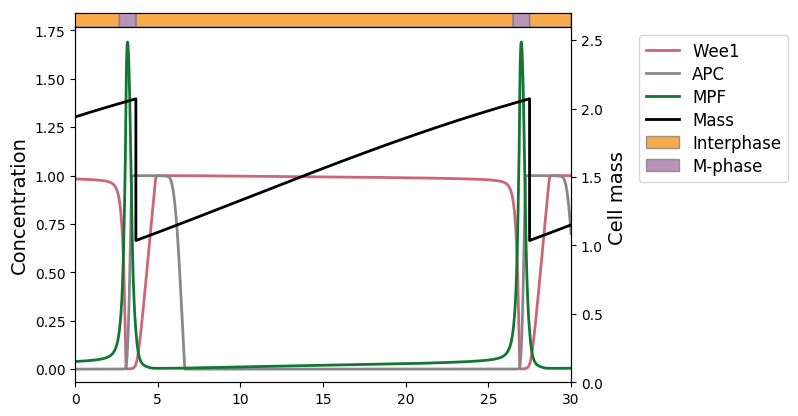

In [10]:
PlotSolution(sol);
#savefig("figures/CCRMV002_fig_solnorad.pdf")

**Radiation scheme:** radiation starting minutes before mitotic entry. Mitotic entry is delayed after induced radiation. Radiation dose is low but sufficiently high to delay mitosis.

In [11]:
u0 = [0.039,      # MPF
      1.660,      # MPF_P
      0.982,      # Wee1
      0.027,      # Cdc25_P
      0.001,      # IE_A
      0.000,      # APC_A
      0.000,      # Chk2_P
      0.000,      # ATM
      0.000,      # DSB
      1.938]      # Mass
tspan = (0.0, 30.0)
dtmax = 0.001
alg = Rosenbrock23()
prob = ODEProblem(f, u0, tspan, params)
# Radiation scheme: 
# 0.4*60 Gy/min*min/hr starts at 1.5 hrs for 1/60 hrs
rad_rate = 0.4
t_0 = 1.5; t_d = 1/60
RadScheme(t) = rad_rate*60*HeaviSide(t, t_0, t_0 + t_d)
sol = solve(prob, alg, callback=cb; (:dtmax, dtmax))
sol.errors

In [12]:
solrad1 = sol;

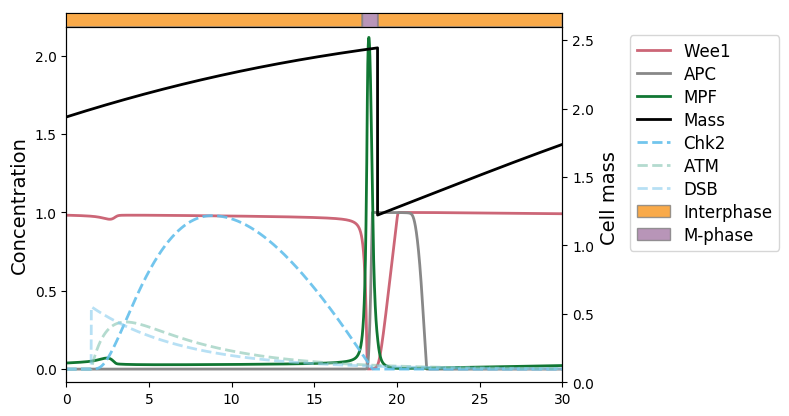

In [13]:
PlotSolution(sol, true);
#savefig("figures/CCRMV002_fig_solrad1.pdf")

**Radiation scheme:** radiation starting minutes before mitotic entry. Mitotic entry is unaffected after induced radiation. Radiation dose is too low to induce a response.

In [14]:
u0 = [0.039,      # MPF
      1.660,      # MPF_P
      0.982,      # Wee1
      0.027,      # Cdc25_P
      0.001,      # IE_A
      0.000,      # APC_A
      0.000,      # Chk2_P
      0.000,      # ATM
      0.000,      # DSB
      1.938]      # Mass
tspan = (0.0, 30.0)
dtmax = 0.001
alg = Rosenbrock23()
prob = ODEProblem(f, u0, tspan, params)
# Radiation scheme: 
# 0.3*60 Gy/min*min/hr starts at 1.5 hrs for 1/60 hrs
rad_rate = 0.3
t_0 = 1.4; t_d = 1/60
RadScheme(t) = rad_rate*60*HeaviSide(t, t_0, t_0 + t_d)
sol = solve(prob, alg, callback=cb; (:dtmax, dtmax))
sol.errors

In [15]:
solrad2 = sol;

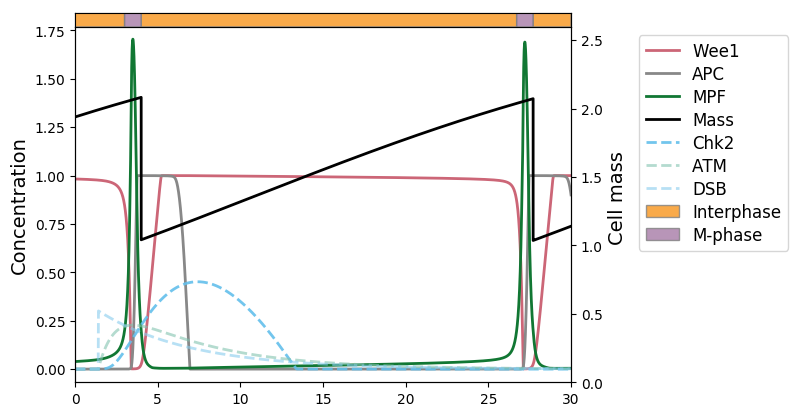

In [16]:
PlotSolution(sol, true);
#savefig("figures/CCRMV002_fig_solrad2.pdf")

**Radiation scheme:** radiation starting some time before mitotic entry during early G2 phase or end of S phase. 

In [58]:
u0 = [0.039,      # MPF
      1.660,      # MPF_P
      0.982,      # Wee1
      0.027,      # Cdc25_P
      0.001,      # IE_A
      0.000,      # APC_A
      0.000,      # Chk2_P
      0.000,      # ATM
      0.000,      # DSB
      1.938]      # Mass
tspan = (0.0, 30.0)
dtmax = 0.001
alg = Rosenbrock23()
prob = ODEProblem(f, u0, tspan, params)
# Radiation scheme: 
# 0.3*60 Gy/min*min/hr starts at 1.2 hrs for 1/60 hrs
rad_rate = 0.3
t_0 = 1.2; t_d = 1/60
RadScheme(t) = rad_rate*60*HeaviSide(t, t_0, t_0 + t_d)
sol = solve(prob, alg, callback=cb; (:dtmax, dtmax))
sol.errors

In [59]:
solrad3 = sol;

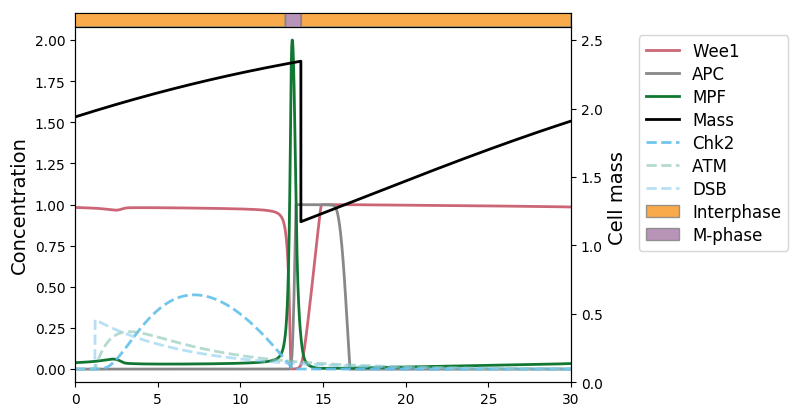

In [60]:
PlotSolution(sol, true);
#savefig("figures/CCRMV002_fig_solrad3.pdf")

### Bifurcation plot: total inactivation rate of Cdc25 ($V_{c2}+k_{c2a}Chk2_P$)

In [20]:
sol = solnorad;

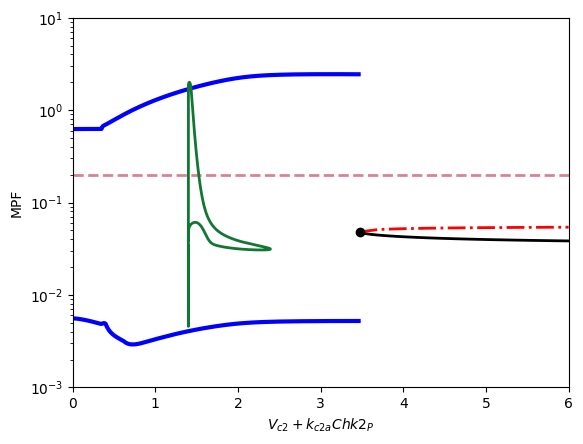

In [63]:
plot([0.0, 6.0], [0.2, 0.2], "--", color=red1, lw=2, alpha=0.8)
PlotBifurcation(bif2_stst, (:V_c2, :MPF))
PlotBifurcation(bif2_lcycle, (:V_c2, :MPF))
plot(params.V_c2 + params.k_c2a*sol[7, :], sol[1, :], color=green2, lw=2)
xlim([0, 6])
xlabel(L"V_{c2} + k_{c2a} Chk2_P")
ylabel("MPF")
yscale("log")
ylim([0.001, 10])
title("")
show()
#savefig("figures/CCRMV002_fig_bif1_norad.pdf")

In [64]:
include("custom_functions.jl");
include("plot_functions.jl");

In [65]:
sol = solrad1;

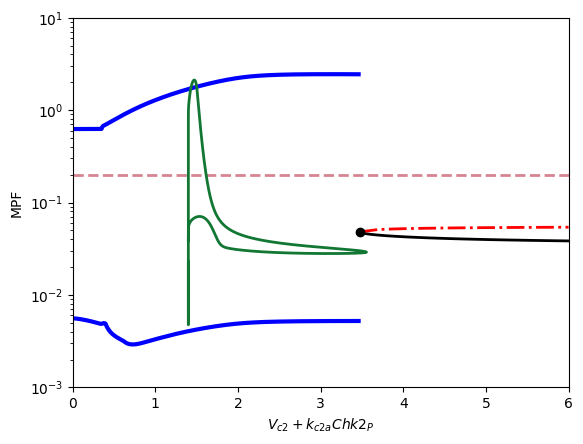

In [66]:
plot([0.0, 6.0], [0.2, 0.2], "--", color=red1, lw=2, alpha=0.8)
PlotBifurcation(bif2_stst, (:V_c2, :MPF))
PlotBifurcation(bif2_lcycle, (:V_c2, :MPF))
plot(params.V_c2 + params.k_c2a*sol[7, :], sol[1, :], color=green2, lw=2)
xlim([0, 6])
xlabel(L"V_{c2} + k_{c2a} Chk2_P")
ylabel("MPF")
yscale("log")
ylim([0.001, 10])
title("")
show()
#savefig("figures/CCRMV002_fig_bif1_rad1.pdf")

In [67]:
sol = solrad2;

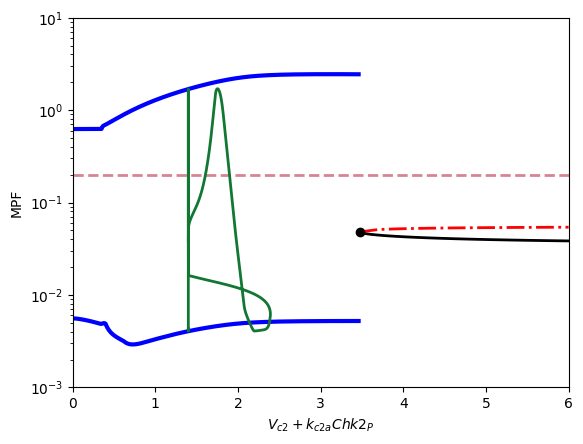

In [68]:
plot([0.0, 6.0], [0.2, 0.2], "--", color=red1, lw=2, alpha=0.8)
PlotBifurcation(bif2_stst, (:V_c2, :MPF))
PlotBifurcation(bif2_lcycle, (:V_c2, :MPF))
plot(params.V_c2 + params.k_c2a*sol[7, :], sol[1, :], color=green2, lw=2)
xlim([0, 6])
xlabel(L"V_{c2} + k_{c2a} Chk2_P")
ylabel("MPF")
yscale("log")
ylim([0.001, 10])
title("")
show()
#savefig("figures/CCRMV002_fig_bif1_rad2.pdf")

In [69]:
sol = solrad3;

In [70]:
plot([0.0, 6.0], [0.2, 0.2], "--", color=red1, lw=1, alpha=0.8)PlotBifurcation(bif2_stst, (:V_c2, :MPF))
PlotBifurcation(bif2_lcycle, (:V_c2, :MPF))
plot(params.V_c2 + params.k_c2a*sol[7, :], sol[1, :], color=green2, lw=2)
plot(params.V_c2 + params.k_c2a*solrad2[7, :], solrad2[1, :], color=green2, ls="--", lw=2, alpha=0.2)
xlim([0, 6])
xlabel(L"V_{c2} + k_{c2a} Chk2_P")
ylabel("MPF")
yscale("log")
ylim([0.001, 10])
title("")
show()
#savefig("figures/CCRMV002_fig_bif1_rad3.pdf")

LoadError: [91mMethodError: no method matching *(::Array{PyCall.PyObject,1}, ::Void)[0m
Closest candidates are:
  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:424
  *([91m::PyCall.PyObject[39m, ::Any) at /home/carlos/.julia/v0.6/PyCall/src/pyoperators.jl:11
  *(::Union{Union{Base.ReshapedArray{S,1,A,MI} where MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{DenseArray, SubArray{T,N,P,I,true} where I<:Tuple{Union{Base.Slice, UnitRange},Vararg{Any,N} where N} where P where N where T}, DenseArray{S,1}, SubArray{S,1,A,I,L} where L} where I<:Tuple{Vararg{Union{Base.AbstractCartesianIndex, Int64, Range{Int64}},N} where N} where A<:Union{Base.ReshapedArray{T,N,A,MI} where MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{DenseArray, SubArray{T,N,P,I,true} where I<:Tuple{Union{Base.Slice, UnitRange},Vararg{Any,N} where N} where P where N where T} where N where T, DenseArray}, Union{Base.ReshapedArray{S,2,A,MI} where MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{DenseArray, SubArray{T,N,P,I,true} where I<:Tuple{Union{Base.Slice, UnitRange},Vararg{Any,N} where N} where P where N where T}, DenseArray{S,2}, SubArray{S,2,A,I,L} where L} where I<:Tuple{Vararg{Union{Base.AbstractCartesianIndex, Int64, Range{Int64}},N} where N} where A<:Union{Base.ReshapedArray{T,N,A,MI} where MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{DenseArray, SubArray{T,N,P,I,true} where I<:Tuple{Union{Base.Slice, UnitRange},Vararg{Any,N} where N} where P where N where T} where N where T, DenseArray}}, [91m::Base.LinAlg.HessenbergQ{T,S} where S<:(AbstractArray{T,2} where T)[39m) where {T, S} at linalg/hessenberg.jl:105
  ...[39m

### Bifurcation diagram: cell mass (cell size) in the intephase module

In [29]:
sol = solnorad;

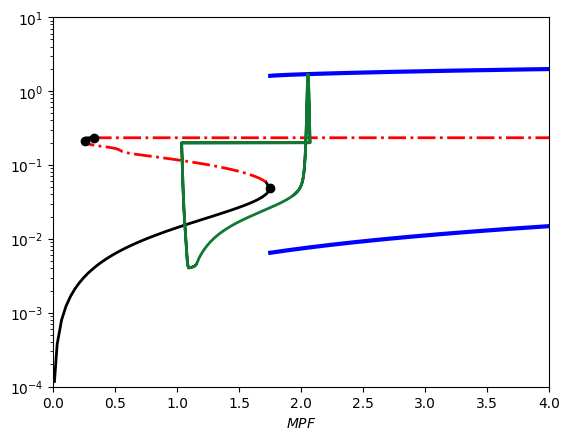

In [30]:
PlotBifurcation(bif1_stst, (:Mass, :MPF))
PlotBifurcation(bif1_lcycle, (:Mass, :MPF))
plot(solnorad[10, :], solnorad[1, :], color=green2, lw=2)
xlim([0, 4])
xlabel(L"Mass")
xlabel(L"MPF")
yscale("log")
ylim([0.0001, 10])
title("")
show()
#savefig("figures/CCRMV002_fig_bif2.pdf")

In [31]:
#= Doesn't work: AUTO not supported
name2 = "HP3"
PCargs = ds[:args](name=name2)
PCargs[:type] = "LC-C"
PCargs[:initpoint] = "EQ1:H1"
PCargs[:freepars] = ["Mass"]
PCargs[:StepSize] = 1e-1
PCargs[:MaxNumPoints] = 10
PCargs[:MaxStepSize] = 1e-0
PCargs[:MinStepSize] = 1e-4
PCargs[:verbosity] = 2
PCargs[:SaveEigen] = true
PC[:newCurve](PCargs)
PC[:curves][name2][:forward]()
PC[:info]()
=#

**Two parameter bifurcation**: Mass and $V_{c2}$

Three fold points: first limit point (SNIC), second limit point (saddle-node), and Hopf point

In [32]:
bif2_stst.special_points["LP"][1][:V_c2]

3.471683398405677

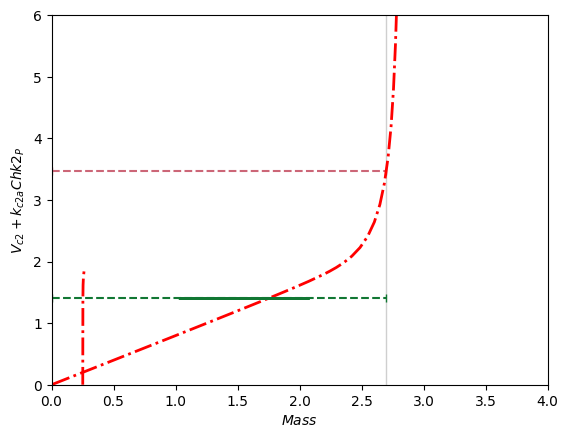

In [33]:
# Base lines
plot([params.K_Mass, params.K_Mass], [0.0, 6.0], color=gray1, lw=1, alpha=0.4)
plot([0.0, params.K_Mass], [params.V_c2, params.V_c2], color=green2, lw=1.5, "--|")
SNIC_V_c2 = bif2_stst.special_points["LP"][1][:V_c2]
plot([0.0, params.K_Mass], [SNIC_V_c2, SNIC_V_c2], color=red1, lw=1.5, "--|")
# Bifurcation curves
PlotBifurcation(bif1_fold1, (:Mass, :V_c2))
PlotBifurcation(bif1_fold2, (:Mass, :V_c2))
# Superimposed solutions
plot(solnorad[10, :], params.V_c2 + params.k_c2a*solnorad[7, :], color=green2, lw=2)
xlim([0, 4])
xlabel(L"Mass")
ylim([0, 6])
ylabel(L"V_{c2}+k_{c2a}Chk2_P")
title("")
show()
#savefig("figures/CCRMV002_fig_bif3_norad.pdf")

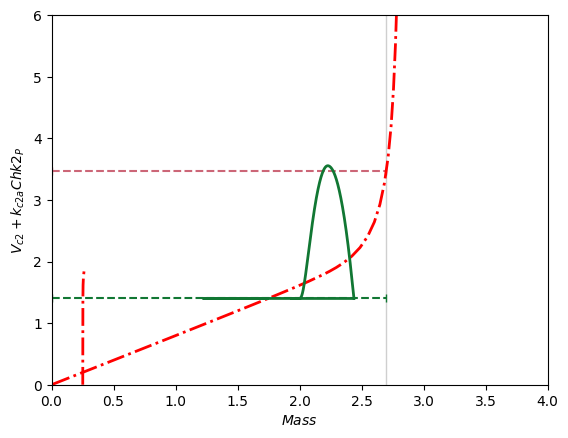

In [36]:
# Base lines
plot([params.K_Mass, params.K_Mass], [0.0, 6.0], color=gray1, lw=1, alpha=0.4)
plot([0.0, params.K_Mass], [params.V_c2, params.V_c2], color=green2, lw=1.5, "--|")
SNIC_V_c2 = bif2_stst.special_points["LP"][1][:V_c2]
plot([0.0, params.K_Mass], [SNIC_V_c2, SNIC_V_c2], color=red1, lw=1.5, "--|")
# Bifurcation curves
PlotBifurcation(bif1_fold1, (:Mass, :V_c2))
PlotBifurcation(bif1_fold2, (:Mass, :V_c2))
# Superimposed solutions
plot(solrad1[10, :], params.V_c2 + params.k_c2a*solrad1[7, :], color=green2, lw=2)
xlim([0, 4])
xlabel(L"Mass")
ylim([0, 6])
ylabel(L"V_{c2}+k_{c2a}Chk2_P")
title("")
show()
#savefig("figures/CCRMV002_fig_bif3_rad1.pdf")

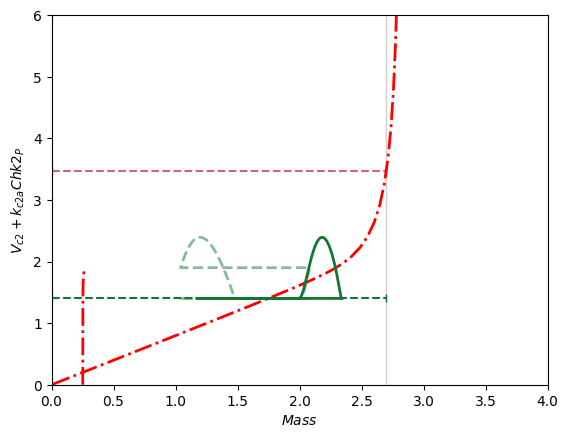

In [37]:
# Base lines
plot([params.K_Mass, params.K_Mass], [0.0, 6.0], color=gray1, lw=1, alpha=0.4)
plot([0.0, params.K_Mass], [params.V_c2, params.V_c2], color=green2, lw=1.5, "--|")
SNIC_V_c2 = bif2_stst.special_points["LP"][1][:V_c2]
plot([0.0, params.K_Mass], [SNIC_V_c2, SNIC_V_c2], color=red1, lw=1.5, "--|")
# Bifurcation curves
PlotBifurcation(bif1_fold1, (:Mass, :V_c2))
PlotBifurcation(bif1_fold2, (:Mass, :V_c2))
# Superimposed solutions
plot(solrad2[10, :], params.V_c2 + params.k_c2a*solrad2[7, :], color=green2, lw=2, alpha=0.5, "--")
plot(solrad3[10, :], params.V_c2 + params.k_c2a*solrad3[7, :], color=green2, lw=2)
xlim([0, 4])
xlabel(L"Mass")
ylim([0, 6])
ylabel(L"V_{c2}+k_{c2a}Chk2_P")
title("")
show()
#savefig("figures/CCRMV002_fig_bif3_rad3.pdf")

### Radiation effect